In [25]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

import fiona, rasterio
import geopandas as gpd
from rasterio.plot import show
import rasterio.plot as rplt
from rasterio.features import rasterize
from rasterstats import zonal_stats
years = [2016, 2017, 2018]

## input files

/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in greater
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in less
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in less
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in less
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in greater
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in less


1.9694076


TypeError: invalid indexer array, does not have integer dtype: array([ 34.,  35.,  35.,  35.,  36.,  36.,  36.,  36.,  37.,  37.,  37.,
        38.,  38.,  40.,  40.,  41.,  41.,  42.,  42.,  42.,  42.,  43.,
        43.,  43.,  43.,  43.,  44.,  44.,  44.,  44.,  44.,  44.,  45.,
        45.,  45.,  45.,  45.,  45.,  46.,  46.,  46.,  46.,  46.,  47.,
        47.,  47.,  47.,  48.,  48.,  48.,  48.,  48.,  49.,  49.,  49.,
        49.,  49.,  49.,  50.,  50.,  50.,  51.,  51.,  51.,  51.,  51.,
        52.,  52.,  52.,  52.,  52.,  52.,  53.,  53.,  53.,  53.,  53.,
        54.,  54.,  54.,  54.,  54.,  55.,  55.,  55.,  55.,  56.,  56.,
        56.,  56.,  57.,  57.,  57.,  57.,  57.,  58.,  58.,  58.,  58.,
        58.,  58.,  59.,  59.,  59.,  59.,  60.,  60.,  60.,  60.,  60.,
        60.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  62.,  62.,  62.,
        62.,  62.,  63.,  63.,  63.,  63.,  63.,  63.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.,  65.,  65.,  65.,  65.,  65.,  65.,  65.,
        65.,  66.,  66.,  66.,  66.,  66.,  66.,  67.,  67.,  67.,  67.,
        68.,  68.,  68.,  69.,  69.,  69.,  69.,  70.,  70.,  70.,  70.,
        70.,  71.,  71.,  71.,  71.,  71.,  72.,  72.,  72.,  72.,  72.,
        73.,  73.,  73.,  73.,  74.,  74.,  74.,  74.,  75.,  75.,  75.,
        75.,  75.,  75.,  76.,  76.,  76.,  76.,  76.,  77.,  77.,  77.,
        77.,  78.,  78.,  78.,  79.,  79.,  79.,  79.,  79.,  80.,  80.,
        80.,  80.,  81.,  81.,  81.,  81.,  81.,  82.,  82.,  82.,  82.,
        82.,  83.,  83.,  83.,  83.,  84.,  84.,  84.,  84.,  85.,  85.,
        85.,  86.,  86.,  87.,  87.,  87.,  88.,  88.,  88.,  88.,  89.,
        89.,  89.,  89.,  90.,  90.,  91.,  91.,  91.,  92.,  92.,  92.,
        92.,  93.,  93.,  93.,  94.,  94.,  95.,  95.,  95.,  95.,  96.,
        96.,  96.,  96.,  97.,  97.,  98.,  99.,  99., 100., 100., 101.,
       101., 102., 103., 103., 104., 104., 105., 105., 106., 107., 108.,
       108., 108., 108., 108., 108., 109., 109., 109., 109., 109., 109.,
       109., 110., 110., 110., 110., 110., 110., 111., 111., 111., 111.,
       111., 111., 112., 112., 112., 112., 112., 112., 113., 113., 113.,
       113., 113., 114., 114., 114., 114., 114., 115., 115., 115., 115.,
       115., 116., 116., 116., 116., 116., 117., 117., 117., 117., 118.,
       118., 118., 118., 118., 119., 119., 119., 119., 119., 120., 120.,
       120., 120., 120., 121., 121., 121., 121., 121., 122., 122., 123.,
       123., 123., 124., 124., 124., 125., 125., 125., 126., 126., 127.,
       127., 127., 128., 128., 128., 129., 129., 129., 130., 130., 130.,
       130., 131., 131., 131., 131., 132., 132., 132., 133., 133., 133.,
       133., 134., 134., 134., 134., 134., 135., 135., 135., 135., 135.,
       136., 136., 136., 136., 136., 136., 137., 137., 137., 137., 137.,
       138., 138., 138., 138., 139., 139., 139., 139., 139., 140., 140.,
       140., 140., 140., 140., 141., 141., 141., 141., 141., 141., 142.,
       142., 142., 142., 142., 142., 143., 143., 143., 143., 143., 143.,
       144., 144., 144., 144., 144., 144., 145., 145., 145., 145., 145.,
       146., 146., 146., 146., 146., 146., 147., 147., 147., 148., 148.,
       149., 149., 150., 150., 150., 151., 151., 151., 152., 152., 152.,
       153., 153., 154., 154., 155., 155., 156., 156., 156., 157., 157.,
       157., 158., 158., 158., 159., 159., 160., 160., 161., 161., 162.,
       162., 162., 163., 163., 164., 164.])

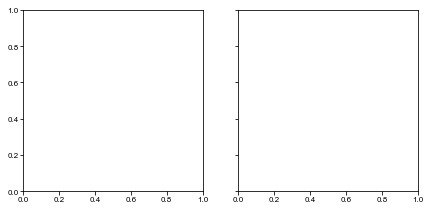

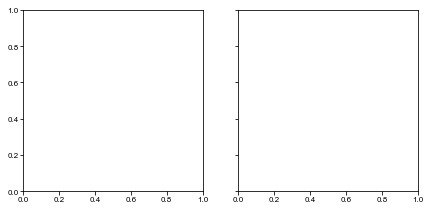

In [26]:
font = {'family' : 'Arial', 'weight' : 'normal', 'size'   : 8}
pylab.rcParams['xtick.major.pad']='1.'
pylab.rcParams['ytick.major.pad']='1.'
fig1, ax1 = plt.subplots(1,2, sharex=True, sharey=True, figsize=(7.08,3.34)) #obs. and flux gate SMB boxplot/errorbar plot
fig2, ax2 = plt.subplots(1,2, sharex=True, sharey=True, figsize=(7.08,3.34)) ##mass conservation plot
count = 0

for yr in range(len(years)-1):
    # season
    balance = 'Ba'  # Bw or Ba (winter or annual)
    # rho_snow = 445. # 470 kg m-3 geodetic or 457 glaciological, or...take given years obs. value
    year = years[yr]
    I = np.abs(year - 2016) # for selecting raster inputs
    vcorr=False ## is velocity corrected by off ice bias and stake bias?

    gl = 2 # number to select glacier
    Glacier = ['Kokanee', 'Conrad', 'Illecillewaet']
    glacier = ['kokanee', 'conrad', 'illecillewaet']
    d = 20. #20.  #distance (m) between flux gate points
    Dint = 0.9 #depth integrated velocity ratio, 1.0= all sliding
    sVZ = 4.91  #velocity against stake measurements
    sHopt = 0.1 #10.3 ## ME:10.3 m,  MAE:0.223 (percent ratio)

    fl_path = '/home/pelto/Desktop/ice_flux/' + Glacier[gl] + '/'
    gpr_path = '/home/pelto/GIS/GPR/ComparisonData/'
    path = '/home/pelto/Desktop/lidar_cbt_analysis/' + glacier[gl] + '/'

    VDIR = 'average'  # 'average' or 'individual'
    if VDIR == 'individual':
    #     vf_list = ['img1_20160912__img1_20170917_vmap_5m_35px_spm2/', 'img1_20160912__img1_20170917_vmap_5m_35px_spm2/',
    #            'img1_20170521__img1_20180426_vmap_5m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/

        vf_list = ['img1_20160912__img1_20170521_vmap_5m_35px_spm2/', 'img1_20160912__img1_20170521_vmap_5m_35px_spm2/',
               'img1_20180426__img2_20181016_vmap_5m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/

    #     vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/spm2/' + vf_list[I]
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/' + vf_list[I]
        VX = vdir+ vf_list[I][:-1] + '-F_vx.tif' 
        VY = vdir+ vf_list[I][:-1] + '-F_vy.tif' 
    else:
#         vf_list = ['illec_all_spm2_5m', 'illec_all_spm2_5m', 'illec_all_spm2_5m']
#         vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/spm2/'  
#         VX = vdir+ 'vx/' +vf_list[I] + '_vx.tif' 
#         VY = vdir+ 'vy/' +vf_list[I] + '_vy.tif'
        vf = 'illecillewaet_all_dem3m_'
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'  
        VX = vdir + vf + 'vx_25m.tif'
        VY = vdir + vf + 'vy_25m.tif'
        VM = vdir + vf + 'vm_25m.tif'
    
    topo_list = ['150911_illecillewaet_dem1_dhdt16.tif', '160912_illecillewaet_dem1_clip_master.tif', '170917_illecillewaet_dem1_clip_slave.tif']
    topo = path + topo_list[I]
    farinotti = gpr_path + 'Illec/Illec_Geike_combi.tif' #''RGI60-02/RGI60-02.03688_thickness.tif' #'RGI60-02.00147_thickness_srtm_corr.tif' #'RGI60-02/RGI60-02.00147'

    dhW_list = ['illecillewaet_2016_winter_dh_dt.tif', 'illecillewaet_2017_winter_dh_dt_dat1_clip.tif', 'illecillewaet_2018_winter_dh_dt_2.tif']
    dhA_list = ['illecillewaet_2016_2015_dh_dt_clip_filled_1617.tif', 'illecillewaet_2017_2016_dh_dt.tif','illecillewaet_2018_2017_dh_dt_zmax1800.tif']
    if balance == 'Bw':
        dh_r = path+ dhW_list[I]   #winter height change TIFF
    else:
        dh_r = path+  dhA_list[I] #Annual height change TIFF

    pts_file = fl_path + 'Illec_flux_gates_16_pts_20m.shp'  ##must be WGS84 currently
    gates = fl_path+'Illec_flux_gates_16.shp'
    shpf = '/home/pelto/GIS/outlines/Illec2016.shp'   #GLIMS_BC/glims_all/all_glaciers_2016.shp' 
    bins=fl_path+'illec_flux_bins.shp'

    obs = pd.read_csv(fl_path+ 'Illecillewaet_bdot.csv')
    rho = pd.read_csv(fl_path + 'illec_rho.csv')  ## rho

    # open GeoTIFF as array
    
    vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
    vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
    msk = salem.open_xr_dataset(fl_path + 'illec_all_glaciers_2016.tif') 
    # msk = msk.to_array(name='msk')
    gpr = salem.open_xr_dataset(fl_path + 'gpr_outline_50_100m_5m.tif') #'gpr_outlines_all_25_25m_re5m.tif'
    farin = salem.open_xr_dataset(farinotti)

    H_opt = salem.open_xr_dataset(fl_path+'Illecillewaet101sw_MAE_optimized.tif') 
    dhdt16 = salem.open_xr_dataset(path + dhA_list[0])
    dhdt17 = salem.open_xr_dataset(path + dhA_list[1])
    gates = salem.read_shapefile(gates)

    vx = vx.to_array(name='vx')
    # np.shape(vx[0]) remove index 1 i.e.: 1,2000,3000
    vy = vy.to_array(name='vy')
    # gpr = gpr.to_array(name='gpr')

    dhdt16_reproj = vx.salem.transform(dhdt16)
    dhdt16 = dhdt16_reproj.to_array(name='dhdt16')
    dhdt17_reproj = vx.salem.transform(dhdt17)
    dhdt17 = dhdt17_reproj.to_array(name='dhdt17')
    H_opt_reproj = vx.salem.transform(H_opt)
    H_opt = H_opt_reproj.to_array(name='H_opt')
    msk_reproj = vx.salem.transform(msk)
    msk = msk_reproj.to_array(name='msk')

    gpr_reproj = vx.salem.transform(gpr)
    gpr = gpr_reproj.to_array(name='gpr')

    farin_reproj= vx.salem.transform(farin)
    farin = farin_reproj.to_array(name='farin')
    srtm_corr = fl_path + 'illecillewaet_SRTM_diff_30m.tif'
    srtm_corr = salem.open_xr_dataset(srtm_corr)
    srtm_corr = vx.salem.transform(srtm_corr)
    srtm_corr = srtm_corr.to_array(name='srtm_corr')
    srtm_corr.data[srtm_corr.data>10.0] = 0.0  ##remove positive anomalous values
    srtm_corr.data[srtm_corr.data<-50.0] = 0.0 ##remove negative anomalous values
    farin_corr = farin + srtm_corr
    farin_corr= farin_corr.rename('farin_corr')

    gpr.data[gpr.data<0] = np.nan
    gpr.data[gpr.data<1.5] = 0.0   #not having any effect
    VZ = np.sqrt(vx.data**2 + vy.data**2 )
    vx.data[msk.data==0] = np.nan
    vy.data[msk.data==0] = np.nan

    VZ_off_ice = VZ.copy()
    VZ_off_ice[msk.data>0.0] = np.nan
    # VZ_off_ice[VZ_off_ice==0.0] = np.nan

    dem = salem.open_xr_dataset(topo)
    dem_reproj = vx.salem.transform(dem)
    dem = dem_reproj.to_array(name='dem')
    dem.data[dem.data<1] = np.nan

    #     # map extent
    # grid = mercator_grid(center_ll=(-117.43, 51.238), extent=(4500, 4500)) ##zoomed out view
    # 487892.000 5509738.000 491232.000 5512358.000
    grid = vx.salem.grid  ##full view
    sm = Map(grid, countries=False)
    sm.set_lonlat_contours(interval=0)
    sm.set_scale_bar()
    sm.set_data(VZ) #, label='m')
    sm.set_vmax(val=50.)
    #      Change the lon-lat countour setting
    sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
    off_ice_V = np.nanmean(VZ_off_ice)
    print(off_ice_V)

    gdf = salem.read_shapefile(shpf)
    sm.set_shapefile(gdf, linewidth=1)
    sm.set_shapefile(gates, linewidth=1.5, color='r')
    #     sm.visualize()
    #     plt.savefig(fl_path+ 'products/'+ glacier[gl] +'_thickness_gates.png', dpi=300)
    #     plt.show()

    ## Functions for calculating zonal statistics over each flux gate bin

    # https://community.esri.com/groups/python-snippets/blog/2019/05/07/calculating-zonal-statistics-with-python-rasterstats
    # For loading shapefiles into geopandas dataframe

    def enum_items(source):
        print("\n")
        for ele in enumerate(source): 
            print(ele)

    def list_columns(df):
        field_list = list(df)
        enum_items(field_list)
        return field_list

    def loadshp_as_gpd(shp):
        data_shp = gpd.read_file(shp)
        return data_shp

    # For loading feature classes into geopandas dataframe
    def loadfc_as_gpd(fgdb):
        layers = fiona.listlayers(fgdb)
        enum_items(layers)
        index = int(input("Which index to load? "))
        fcgpd = gpd.read_file(fgdb,layer=layers[index])
        return fcgpd

    # For re-projecting input vector layer to raster projection
    def reproject(fcgpd, raster):
        proj = raster.crs.to_proj4()
        print("Original vector layer projection: ", fcgpd.crs)
        reproj = fcgpd.to_crs(proj)
        print("New vector layer projection (PROJ4): ", reproj.crs)
    #     fig, ax = plt.subplots(figsize=(15, 15))
    #     rplt.show(raster, ax=ax)
    #     reproj.plot(ax=ax, facecolor='none', edgecolor='red')
    #     fig.show()
        return reproj

    def dissolve_gpd(df):
        field_list = list_columns(df)
        index = 1 #int(input("Dissolve by which field (index)? "))
        dgpd = df.dissolve(by=field_list[index])
        return dgpd

    # For selecting which raster statistics to calculate
    def stats_select():
        stats_list = stats_list = ['min', 'max', 'mean', 'count', 
                  'sum', 'std', 'median', 'majority', 
                  'minority', 'unique', 'range']
        enum_items(stats_list)
    #     indices = input("Enter raster statistics selections separated by space: ")
        indices='2 3 5 6'
        stats  = list(indices.split())
        out_stats = list()
        for i in stats:
            out_stats.append(stats_list[int(i)])
        return out_stats

    def get_zonal_stats(vector, raster, stats):
        # Run zonal statistics, store result in geopandas dataframe
        result = zonal_stats(vector, raster, stats=stats, geojson_out=True)
        geostats = gpd.GeoDataFrame.from_features(result)
        return geostats

    ## make an ice velocity quiver plot

    #fig, ax = plt.subplots(1,1,figsize=(10,10))

    df = salem.read_shapefile(pts_file) 

    df_file = loadshp_as_gpd(pts_file)
    df_file.crs

    coords = np.array([p.xy for p in df.geometry]).squeeze()
    df['lon'] = coords[:, 0]
    df['lat'] = coords[:, 1]

    # ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);
    xx, yy = salem.transform_proj(salem.wgs84, grid.proj, df['lon'].values, df['lat'].values)
    df['x'] = xx
    df['y'] = yy

    # shp_plt = reproject(df, VX)

    X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
    U = vx.data[0]
    V = vy.data[0]

    # Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
    # Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')
    # ax.set_xlim(502500, 507500)
    # ax.set_ylim( 5624000, 5631500)
    #     plt.quiver(vx.x, vx.y, vx.data ,vy.data)
    # plt.savefig(fl_path+ 'products/'+ glacier[gl]+ str(year)+'_quiver.pdf', dpi=300)

    # grid.ij_coordinates
    # v_crs = check_crs(vx)

    vns = ['vx',
           'vy',
           'gpr',
           'H_opt',
           'dem',
           'farin_corr',
           'dhdt16',
           'dhdt17'
           ]

    M = xr.merge([vx,vy,gpr,H_opt,dem,farin_corr,dhdt16,dhdt17])

    df[0:4]

    for vn in vns:
        df[vn] = M[vn][0].interp(x=('z', df.x), y=('z', df.y))

    df[0:4]

    df_agg = df[['id', 'len', 'distance', 'angle', 'geometry', 'lon', 'lat']].copy()
    ii, jj = grid.transform(df['lon'], df['lat'], crs=salem.wgs84, nearest=True)
    df_agg['i'] = ii
    df_agg['j'] = jj
    # # We trick by creating an index of similar i's and j's
    # df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in (vx.coords['x'], vx.coords['y'])]
    df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in zip(ii, jj)]
    df_agg = df_agg.groupby('ij').mean()

    # Select
    for vn in vns:
    #     M_maksed = np.ma.masked_invalid(M[vn][0])
    #     df_agg[vn] = .interp(x=('z', df_agg.i), y=('z', df_agg.j))
        df_agg[vn] = M[vn][0].isel(x=('z', df_agg.i), y=('z', df_agg.j))  

    D = df_agg[['id', 'len', 'distance', 'angle', 'lon', 'lat', 'vx', 'vy', 'gpr', 'H_opt', 'dem', 'farin_corr',
                'dhdt16', 'dhdt17']].copy()
    D

    import math
    D['vz'] = np.sqrt(D.vx**2 + D.vy**2 )  # np.sqrt(U**2 + V**2 )

    D['vzdir'] = np.arcsin(D.vx/D.vz) *180/math.pi #degrees from north
    # D.vzdir[D.vzdir>25.0]=np.nan  ##remove outliers for Kokanee only!!

    ###this step for Illec only!!
    D.vzdir[D.vzdir>0.0]=np.nan ## remove false velocity vectors which plague the accumulation zone 


    #multiply velocity vector by cosine of angle between vector and flux gate (line or line segment)
    D['vfg'] = np.abs(D.vz * np.cos((D.vzdir-(D.angle-90.))*(math.pi/180.))) #velocity normal to gate per slice

    ##acount for height change on measured ice thickness
    if year == 2016:
        dh16 = D.dhdt16 - D.dhdt17
        D.H_opt = D.H_opt - dh16
        D.farin_corr = D.farin_corr - dh16
        D.gpr = D.gpr - dh16
    elif year == 2017:
        D.H_opt = D.H_opt - D.dhdt17
        D.farin_corr = D.farin_corr - D.dhdt17
        D.gpr = D.gpr - D.dhdt17
        
    KP=[]
    KF=[]
    for loop in D.index:
        ID= D[D.index==loop].id.values
#         if ((ID==0) | (ID==1)):     
#             KP.append( ((D[D.index==loop].vfg)* (Dint+0.1) * d * D.H_opt[D.index==loop]).values[0])  
#             KF.append( ((D[D.index==loop].vfg)* (Dint+0.1) * d * D.farin_corr[D.index==loop]).values[0])
#         else:
        KP.append((D[D.index==loop].vfg * Dint * d * D.H_opt[D.index==loop]).values[0])  ## ice flux per slice *0.9 to est. depth-integrated velocity
        KF.append((D[D.index==loop].vfg * Dint * d * D.farin_corr[D.index==loop]).values[0])
            
            
    D['Qopt'] = KP
    D['Qfarin'] = KF

    # if vcorr==True:
    #     D['Qopt'] = (D.vfg - off_ice_V + sVZ) * Dint * d * D.H_opt 
    #     D['Qfarin'] = (D.vfg- off_ice_V+sVZ) * Dint * d * D.farin_corr 
    #     ## ice flux per slice *0.9 to est. depth-integrated velocity
    # else:
    #     D['Qopt'] = (D.vfg) * Dint * d * D.H_opt 
    #     D['Qfarin'] = (D.vfg) * Dint * d * D.farin_corr 

    D['a'] = d * D.H_opt #area per slice
    D['a_farin'] = d * D.farin_corr #area per slice

    ### Uncertainties
    # D['sQopt'] = np.sqrt((sVZ**2) * ((D.H_opt**2 + (sHopt * D.H_opt)**2) * (D.vfg*0.9)**2) * d**2) #d=10 meters, point spacing
    D['sQout'] = np.sqrt((sVZ * (D.H_opt) * d)**2 + ((D.vfg*Dint) * d * (sHopt*D.H_opt))**2)
    D['sQoutF'] = np.sqrt((sVZ * (D.farin_corr) * d)**2 + ((D.vfg*Dint) * d * (sHopt*D.farin_corr))**2)

    # D['sQout'] = np.sqrt((sVZ**2) * ((D.H_opt**2 + (sHopt*D.H_opt)**2) * (D.vfg*Dint)**2) * d**2)
    # D['sQoutF'] = np.sqrt((sVZ**2) * ((D.farin_corr**2 + (sHopt*D.farin_corr)**2) * (D.vfg*Dint)**2) * d**2)

    Q_out= [0.,] #flux out per gate
    cr_area = [0.,] # cross-section area per gate
    vzdir = [0.,]
    sQout= [0.,]


    for n in range(D.id.nunique()+1):
            Q_out.append(D.Qopt[D.id==n].sum()) 
            cr_area.append(D.a[D.id==n].sum())
            vzdir.append(D.vzdir[D.id==n].mean())
            sQout.append(D.sQout[D.id==n].sum()) 
    #         area_Qin.append(D.[D.id==n].sum()) 
    Q_in = [Q_out[1:]]
    sQin = [sQout[1:]+ [0.0]]
    # area_Qin = 
    # area_Qin= 
    Q_in = np.squeeze(Q_in)
    sQin = np.squeeze(sQin)


    Q_outF= [0.,] #flux out per gate
    cr_areaF = [0.,]
    sQoutF = [0.,]
    for n in range(D.id.nunique()+1):
            Q_outF.append(D.Qfarin[D.id==n].sum()) 
            cr_areaF.append(D.a_farin[D.id==n].sum()) 
            sQoutF.append(D.sQoutF[D.id==n].sum())

    Q_inF = [Q_outF[1:]] #flux in per bin
    Q_inF = np.squeeze(Q_inF)
    sQinF = [sQoutF[1:]+ [0.0]]
    sQinF = np.squeeze(sQinF)

    FG = pd.DataFrame(list(zip(Q_out, Q_in, cr_area, sQout, sQin, Q_outF, Q_inF, sQoutF, sQinF, cr_areaF, vzdir)), 
            columns=['Q_out', 'Q_in', 'cr_area', 'sQout', 'sQin', 'Q_outF', 'Q_inF','sQoutF', 'sQinF', 'cr_areaF', 'vzdir']) 

    FG['vfg'] = FG.Q_out / FG.cr_area #net velocity per gate
    FG['vfgF'] = FG.Q_outF / FG.cr_area
    FG['bin']=np.arange(0,len(range(D.id.nunique()+1)),1)
    # FG['sQnet_opt'] = np.sqrt(FG.sQopt**2 + FG.sQin**2)

    FG

    ### import data per bin: height change, elevation, surface area, obs.SMB etc. 

    FG_df = FG.copy()
    dem_r = topo
    vel_r = VM   #vdir + vf[:-1] + '-F_vm.tif'
    shp = loadshp_as_gpd(bins)

    rasters = [dh_r, dem_r, vel_r]
    names = ['dh','dem','vy']
    for i in range(len(rasters)):
        raster = rasters[i]
        rst = rasterio.open(raster)
        shp = reproject(shp, rst) #shp is in correct projection, trying anyway for calculation
        # dhdt= vx.salem.transform(dhdt)
        name = names[i]
    #     shp_vec = dissolve_gpd(shp)  ## only if more columns exist
        stats = stats_select()  #'['min', 'max', 'mean', 'count', 'sum', 'std', 'median', 'majority', 'minority', 'unique', 'range']
        ZS = (get_zonal_stats(shp, raster, stats))
        ZS.drop(['geometry'], axis=1, inplace=True)
        ZS.rename(columns={"mean": name+"_mean", "median":name+"_med", "std": name+"_std", "count":name+"_count"}, inplace=True)
        ZS.sort_values(by=['bin'],ascending=True, inplace=True)
        ZS.set_index('bin', inplace=True)
        FG_df =  pd.concat([FG_df, ZS], axis=1)


    rho.sort_values(by='bin',ascending=True, inplace=True) # sort by bin
    rho.set_index('bin', inplace=True) # set bin as index for sorting
    rho[0:4]
    FG_df =  pd.concat([FG_df, rho], axis=1)
    FG_df

    WR= np.array(FG_df.dem_count[1:])
    WR= np.append(WR,[0])

    FG_df['Q_net'] = FG_df.Q_in - FG_df.Q_out  #net flux per gate
    FG_df['Q_netA']= FG_df.Q_net / FG_df.dem_count

    FG_df['Q_netF'] = FG_df.Q_inF - FG_df.Q_outF  #net flux per gate
    FG_df['Q_netAF']= FG_df.Q_netF / FG_df.dem_count


    FG_df['area_Qin']= WR
    FG_df['sQoptA'] = FG_df.sQout / FG_df.dem_count
    FG_df['sQ_inA'] = FG_df.sQin / (FG_df.area_Qin+0.001)
    FG_df['sQnetA_opt'] = np.sqrt(FG_df.sQoptA**2 + FG_df.sQ_inA**2)

    FG_df['sQoutFA'] = FG_df.sQoutF / FG_df.dem_count
    FG_df['sQ_inFA'] = FG_df.sQinF / (FG_df.area_Qin+0.001)
    FG_df['sQnetFA'] = np.sqrt(FG_df.sQoutFA**2 + FG_df.sQ_inFA**2)


    ##calculate height change due to mass balance for highest bins considering firn compaction
    FG_df['b_fg_h'] = FG_df.dh_mean - FG_df.Q_netA + FG_df.Vfirn
    FG_df['b_fg_hF'] = FG_df.dh_mean - FG_df.Q_netAF + FG_df.Vfirn

    # FG_df['b_fg_h'] = FG_df.dh_mean - FG_df.Q_netA
    ## Ilec slope, constant: (0.025293682808396056, 400.09590745271896)
    FG_df['rho_snow'] = (FG_df.dem_mean*(-0.02529))+400.095  #*-0.11255+743.22)
    if balance == 'Bw':
    #     FG_df['b_fg_we'] = rho_snow/1000. * FG_df.b_fg_h
        FG_df['b_fg_we'] = FG_df.rho_snow/1000 * FG_df.b_fg_h
    else:
        FG_df['b_fg_we'] = FG_df['rho_%s'%year]/1000. * FG_df.b_fg_h

    if balance == 'Bw':
    #     FG_df['b_fg_weF'] = rho_snow/1000. * FG_df.b_fg_hF
        FG_df['b_fg_weF'] = FG_df.rho_snow/1000 * FG_df.b_fg_hF
    else:
        FG_df['b_fg_weF'] = FG_df['rho_%s'%year]/1000. * FG_df.b_fg_hF
    # FG_df.drop(FG_df.tail(1).index,inplace=True)

    FG_df

    ### Uncertainties
    sDHdt = 0.04 #m Bias dh from Pelto et al. 2019
    sVfirn = 0.10
    sRHO = 0.05 # percent uncertainty in density

    # if FG_df.Vfirn > 0.00:
    # FG_df['sDH_opt'] = np.sqrt(sDHdt**2 + (FG_df.sQnet_opt / FG_df.dem_count)**2 + (FG_df.Vfirn*sVfirn)**2) #FG_df.sQnet_opt / FG_df.dem_count
    FG_df['sDH_opt'] = np.sqrt(sDHdt**2 + (FG_df.sQnetA_opt)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_opt'] = np.sqrt((FG_df.sDH_opt * (FG_df['rho_%s'%year]/1000.))**2+
                   (FG_df.dh_mean * (FG_df['rho_%s'%year]/1000.*sRHO))**2)

    FG_df['sDH_F'] = np.sqrt(sDHdt**2 + (FG_df.sQnetFA)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_F'] = np.sqrt((FG_df.sDH_F * (FG_df['rho_%s'%year]/1000.))**2+
                   (FG_df.dh_mean * (FG_df['rho_%s'%year]/1000.*sRHO))**2)

    FG_df

    D['Agpr']=np.NaN
    D.sort_values(by=['distance'],ascending=True, inplace=True) 
    D = D.dropna(subset=['gpr'])
    for n in range(D.id.nunique()):

        for c in range(D.id[D.id==n].count()-1):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0:
                G= D.distance[D.id==n][c+1] - D.distance[D.id==n][c] * D.gpr[D.id==n][c+1]*0.5 #area of triangle
            elif c==1:
                G= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2 * D.gpr[D.id==n][c]
            elif c==len(D.id[D.id==n])-2: #
                G= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 * D.gpr[D.id==n]
            elif c==len(D.id[D.id==n])-1:  #last point in line
                G= D.distance[D.id==n][c] + D.distance[D.id==n][c+1] * D.gpr[D.id==n][c-1]*0.5 #area of triangle
            else:
                G=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))* D.gpr[D.id==n][c]  

            D.loc[idx,'Agpr']= G
    #         D['Q_gpr'] = (D.vfg * 0.9 *D['Agpr'])
    #     D['A'] = D.vfg[D.id==n] * D.gpr[D.id==n]
    for n in range(D.id.nunique()):

        for c in range(D.id[D.id==n].count()-1):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0:
                L= D.distance[D.id==n][c+1] - D.distance[D.id==n][c] 
            elif c==1:
                L= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2 
            elif c==len(D.id[D.id==n])-2: #
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 
            elif c==len(D.id[D.id==n])-1:  #last point in line
                L= D.distance[D.id==n][c] + D.distance[D.id==n][c+1] 
            else:
                L=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))

            D.loc[idx,'Len_gpr']= L

    #calculate flux out using GPR thicknesses
    sGPR = 0.0516 #gpr error %
    D['sInterp_gpr'] = np.nan
    for n in range(len(D.Len_gpr)):
        if D.Len_gpr[n] > 50.:
            D.sInterp_gpr[n] = D.gpr[n] * 0.10  
        else: 
            D.sInterp_gpr[n] = 0.0
    sH_gpr = np.sqrt(D.sInterp_gpr**2+ (D.gpr*sGPR)**2)
    # if vcorr==True:
    #     D['Qo_gpr'] = D.Agpr * (D.vfg - off_ice_V+sVZ) * Dint#* 0.9
    # else:
    D['Qo_gpr'] = D.Agpr * (D.vfg) * Dint#* 0.9
    D['sQo_gpr'] =  np.sqrt((sVZ * (D.gpr) * D.Len_gpr)**2 + ((D.vfg*Dint) * D.Len_gpr * (sH_gpr))**2)

    # D['sQo_gpr'] = np.sqrt((sVZ**2) * ((D.gpr**2 + (sH_gpr)**2) * (D.vfg*Dint)**2) * d**2)

    D

    # D.to_csv(fl_path+'kok_16.csv') #'kokanee_gpr_fluxG_pts.csv')
    # for i in range(len(range(D.id.nunique()+1))):
    #     print(i, D.Agpr[D.id==i].mean())

    Qo_gpr = [0.,] #flux out per gate
    cr_area_gpr = [0.,] # cross-section area per gate
    vzdir_gpr = [0.,]
    sQo_gpr= [0.,]
    n=0
    for n in range(D.id.nunique()):
            Qo_gpr.append(D.Qo_gpr[D.id==n].sum()) 
            cr_area_gpr.append(D.Agpr[D.id==n].sum())
            vzdir_gpr.append(D.vzdir[D.id==n].mean())
            sQo_gpr.append(D.sQo_gpr[D.id==n].sum())
    Qin_gpr = [Qo_gpr[1:]+ [0.0]] #flux in per bin, add zero to end for top bin (for now)
    Qin_gpr = np.squeeze(Qin_gpr)
    sQin_gpr = [sQo_gpr[1:]+ [0.0]]
    sQin_gpr = np.squeeze(sQin_gpr)


    FG_gpr = pd.DataFrame(list(zip(Qo_gpr, Qin_gpr, cr_area_gpr, sQo_gpr,sQin_gpr)), 
                          columns=['Qo_gpr', 'Qin_gpr', 'cr_area_gpr', 'sQo_gpr','sQin_gpr']) 
    FG_gpr['bin'] = np.arange(0,len(range(D.id.nunique()+1)),1)#[0,1,2,3]
    # FG_gpr['vfg'] = FG_gpr.Qo_gpr / FG_gpr.cr_area_gpr #net velocity per gate
    # FG['bin']=np.arange(0,14,1)
    FG_gpr

    FG_df

    FG_all = FG_df.merge(FG_gpr, how='left') #on='bin')  
    # FG_all
    FG_all['Q_net_gpr'] = FG_all.Qin_gpr - FG_all.Qo_gpr 
    FG_all['Q_netA_gpr']= FG_all.Q_net_gpr / FG_all.dem_count 
    FG_all['b_fg_h_gpr'] = FG_all.dh_mean - FG_all.Q_netA_gpr  #dh1516_mean


    FG_all['sQoutA_gpr'] = FG_all.sQo_gpr / FG_all.dem_count
    FG_all['sQ_inA_gpr'] = FG_all.sQin_gpr / (FG_all.area_Qin+0.001)
    FG_all['sQnetA_gpr'] = np.sqrt(FG_all.sQoutA_gpr**2 + FG_all.sQ_inA_gpr**2)


    if balance == 'Bw':
        FG_all['b_fg_we_gpr'] = FG_df.rho_snow/1000. * FG_all.b_fg_h_gpr
    else:
        FG_all['b_fg_we_gpr'] = FG_all['rho_%s'%year]/1000. * FG_all.b_fg_h_gpr
    # FG_all.drop(FG_all.tail(1).index,inplace=True)

    FG_all['sDH_gpr'] = np.sqrt(sDHdt**2 + (FG_all.sQnetA_gpr)**2 + (FG_all.Vfirn*sVfirn)**2)
    FG_all['sBwe_gpr'] = np.sqrt((FG_all.sDH_gpr * (FG_all['rho_%s'%year]/1000.))**2+
                   (FG_all.dh_mean * (FG_all['rho_%s'%year]/1000.*sRHO))**2)

    # FG_all['dem_mean']
    FG_all

    ## Plot balance gradients

    import seaborn as sns
    from scipy import stats
    from scipy.optimize import curve_fit
    from scipy.interpolate import interp1d
    import statsmodels.api as stm

    from matplotlib.collections import PatchCollection
    from matplotlib.patches import Rectangle


    font = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 8}

    plt.rc('font', **font)

    n = 0
    s= 15 #markersize

    a = 0.9
    color=['b', 'lime', 'green', 'teal']

    ##all_obs
    if balance == 'Bw':
        obs = obs.dropna(subset=['Bw'])
        y_ax_obs=obs[(obs.Year==year)].Bw

    else:
        obs = obs.dropna(subset=['Ba'])
        y_ax_obs=obs[(obs.Year==year)].Ba


    x_ax_obs=obs[(obs.Year==year)].Elev

    # Drop unrealistic FG smb:
    new = FG_all.copy()
#     new = new[new.b_fg_we >-8.]
#     new = new[new.b_fg_we_gpr >-8.]

    #errors (above and below)
    # new['yerr'] = 0.20
    yerr = [0.0, new.sBwe_gpr , new.sBwe_opt, new.sBwe_F] #new.sBwe_gpr
    new['xerr'] = new.dem_std * 1.5 #2 std dev -- 95% of data
    xerr = new.xerr 

    x_ax_fg_gpr=new.dem_mean
    y_ax_fg_gpr=new.b_fg_we_gpr

    x_ax_fg_opt=new.dem_mean  #FG_df.elev_mean
    y_ax_fg_opt=new.b_fg_we
    x_ax_fg_F=new.dem_mean  
    y_ax_fg_F=new.b_fg_weF

    x = [x_ax_obs, x_ax_fg_gpr, x_ax_fg_opt, x_ax_fg_F]
    y = [y_ax_obs, y_ax_fg_gpr, y_ax_fg_opt, y_ax_fg_F]
    color = ['k', 'teal', '#74c476', '#238b45', ]
    label = ['Obs.', 'Fg gpr', 'Fg opt.','Farinotti']
    sym = ['o', '^', 's', 'd']

    # Call function to create error bars 
    shift = [-20,0,20]
    for i in range(3):
        ax1[count].errorbar((x[i+1]+shift[i]), y[i+1], xerr=None, yerr=yerr[i+1], fmt=sym[i+1], ecolor=color[i+1], zorder=2,
                              label=label[i+1], alpha=0.4, c=color[i+1]) #elinewidth=0.7

    ## plot data and regression lines
    ax1[count].scatter(x[0],y[0],color=color[0], label=label[0], alpha=a, s=s,facecolor='', zorder=3)  ##plot obs data
    
    ytxt = [0.2, 0.15, 0.1, 0.05]
    for i in range(4):
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x[i]),np.array(y[i]))
        txt= ['Obs. slope:        ', 'FG gpr slope:    ', 'FG opt. slope:   ', 'FG Farin. slope: ']

        #################### RLM  https://www.statsmodels.org/stable/rlm.html
        ###https://www.statsmodels.org/devel/generated/statsmodels.robust.robust_linear_model.RLMResults.html
        exog = stm.add_constant(x[i]) #obs_data.Elev)
        rlm_model = stm.RLM(y[i],exog, M=stm.robust.norms.HuberT()) #data.endog, data.exog,
        rlm_results = rlm_model.fit()
        stdE=rlm_results.bse[1]
        # print(rlm_results.params)
         # ax.scatter(x[i],y[i],color=color[i], label='data', alpha=a, s=s,facecolor='', zorder=3)
        #     ax = sns.boxplot(x=x[i], y=y[i], palette='copper', saturation=0.7)#, ax=ax)
        ax1[count].plot(x[i],rlm_results.params[1]*x[i]+rlm_results.params[0], color=color[i],label='', alpha=a, 
                linewidth=0.8, zorder=3) # linestyle='--'
        print('slope RLM:', rlm_results.params[1])
        #############################
        ax1[count].text(0.5, ytxt[i]+0.05, txt[i]+str(np.round(1000*rlm_results.params[1],2))+ ' +/- ' + 
                str(np.round(1000*stdE,2)), transform=ax1[count].transAxes)

    if balance == 'Ba':
        ax1[count].axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)

    ############ obs data box plot ##################################################
    obs_data=obs[(obs.Year==year)]
    obs_data.reset_index(inplace=True)

    bin_size = 100.
    z_range = np.arange(2050., 2750., bin_size)
    # print(z_range)
    # obs_data['Elev_bin'] = np.nan

    i = 0
    # for n in range(len(obs_data.Ba)):

    Z_F = []
    Zor_F= []
    OB_F=[]

    for z in z_range: 
        OBS = []
        Z = []
        Zor = []
        W=0
        bin_size = 100.
        while W==0:
            for n in range(len(obs_data[balance])):
                if ((z - bin_size/2.) <= obs_data.Elev[n]) and (obs_data.Elev[n] <=  (z + bin_size/2.)):
                    O = obs_data[balance][n]
                    Z.append(z)
                    Zor.append(obs_data.Elev[n])
                    OBS.append(O)

            if len(OBS)<3:
                ##could select last element below elevation
                bin_size=bin_size*1.5
            else:
                OB_F.append(np.array(OBS))
                Z_F.append(np.array(Z))
                Zor_F.append(np.array(Zor))

                W=1
        i += 1
        
        
    GPR = []
    OPT = []
    FAR = []  
    for z in z_range:
        GG=[]
        PP=[]
        FF=[]
        for n in range(len(new.dem_mean)):
            if ((z - bin_size/2.) <= new.dem_mean[n]) and (new.dem_mean[n] <=  (z + bin_size/2.)):
                G = new.b_fg_we_gpr[n]
                P = new.b_fg_we[n]
                F = new.b_fg_weF[n]
                GG.append(G)
                FF.append(F)
                PP.append(P)
                
        GPR.append(np.array(GG))
        OPT.append(np.array(PP))
        FAR.append(np.array(FF))
        
##################Difference###########################################################
    if count == 0:
        gpr_bdiff=[]
        opt_bdiff=[]
        farin_bdiff=[]
       
    OBF=[]
    GPRq=[]
    OPTq=[]
    FARq=[]
    for i in range(len(OB_F)):
        OBF.append(np.round(OB_F[i].mean(),3))
        GPRq.append(np.round(GPR[i].mean(),3))
        OPTq.append(np.round(OPT[i].mean(),3))
        FARq.append(np.round(FAR[i].mean(),3))
        
    gpr_bdiff.extend((np.array(OBF) - np.array(GPRq)))
    opt_bdiff.extend((np.array(OBF) - np.array(OPTq)))
    farin_bdiff.extend((np.array(OBF) - np.array(FARq)))
    
###################End difference##########################


    # thieves = sns.boxplot(x=obs_data.Elev_bin, y=obs_data.Ba, hue=obs_data.Year, palette='BuGn', saturation=0.7, ax=ax)
    # ax = sns.boxplot(x=Z_F, y=OB_F, palette='BuGn', saturation=0.7)#, ax=ax)
    meanlineprops = dict(linestyle='--', linewidth=1., color='0.5')
    medianprops = dict(linestyle='-', linewidth=1, color='k')
    BOX=ax1[count].boxplot(OB_F,meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
                        positions=[2050., 2150., 2250., 2350., 2450., 2550., 2650.,],widths=50)
############################
    
    letter = ['a','b','c']
    ax1[count].text(0.95, 0.04, letter[count], fontweight='bold', transform=ax1[count].transAxes)
    ax1[count].set_xticklabels([2050, 2150,  2250, 2350, 2450, 2550, 2650])

    ax1[count].set_xlim(2000,2700)
    ax1[count].set_ylim(-7.2,2.25)
     
    ax1[0].legend(loc='upper left')#, bbox_to_anchor=(0, 0.42, 0.7, 0.5), labelspacing=0.2, handletextpad=0.1)
    ax1[0].set_ylabel('Mass balance (m w.e.)')
    

    fig1.text(0.48, 0.02, 'Elevation (m a.s.l.)') #set_xlabel
    fig1.subplots_adjust(bottom=0.10, top=0.98, hspace=0.1, left=0.06, right=0.99, wspace=0.05)
    
     ################# mass conservation plot ####################################
    BM= []
    for i in range(len(OB_F)):
        B = OB_F[i].mean()
        BM.append(B)
    BM = np.squeeze(BM)
    BM = {'SMB': BM}
    BM = pd.DataFrame(data=BM, index=None)
    new['SMB'] = BM
    new['BMC'] = (new.SMB * new['rho_%s'%year]/1000.) + new.Q_netA + new.Vfirn 
    new['Bdh'] = new.dh_mean   

    new['BMC_gpr'] = (new.SMB * new['rho_%s'%year]/1000.) + new.Q_netA_gpr + new.Vfirn 
    new['BMCF'] = (new.SMB * new['rho_%s'%year]/1000.) + new.Q_netAF + new.Vfirn 

    # shiftMC = [10, 20, 30]
    MC = [new.BMC_gpr,new.BMC, new.BMCF]
    
    for i in range(3):
        ax2[count].errorbar(new.dem_mean+shift[i],MC[i], xerr=None, yerr=yerr[i+1]*0.91*2., fmt=sym[i+1], 
                     c=color[i+1], label=label[i+1], alpha=a, zorder=2)
    
    ax2[count].errorbar(new.dem_mean,new.Bdh, xerr=50, yerr=0.25, fmt='o', c='k', label='LiDAR', 
                alpha=0.8, zorder=3, mfc='none')
    ax2[count].text(0.95, 0.95, letter[count], fontweight='bold', transform=ax2[count].transAxes)
#     ax2[count].set_xticklabels([2050, 2150,  2250, 2350, 2450, 2550, 2650])
    ax2[0].legend(loc='ul')
    ax2[count].set(xlim=(2010, 2675), ylim=(-6.0, 4.1)) 
    fig2.text(0.48, 0.02, 'Elevation (m a.s.l.)') #set_xlabel
    ax2[0].set_ylabel('Height change (m ice $a^{-1}$)')
    fig2.subplots_adjust(bottom=0.125, top=0.99, hspace=0.1, left=0.10, right=0.99, wspace=0.05)
     ################# end mass conservation plot ####################################
    count+=1

In [ ]:

fig1.savefig(fl_path + 'products/' + glacier[gl] + '_bdot_3_panel_' + balance +  '_all_years.pdf', dpi=300) #+ Glacier[gl]
fig2.savefig(fl_path + 'products/' + glacier[gl] + '_mass_con_' + balance +'.pdf', dpi=300)

In [ ]:
new.dh_mean

In [ ]:
gpr_bdiff_abs = np.abs(gpr_bdiff)
opt_bdiff_abs = np.abs(opt_bdiff)
farin_bdiff_abs = np.abs(farin_bdiff)
print('mean gpr diff:', round(np.mean(gpr_bdiff),2), '+/-',round(np.std(gpr_bdiff),2),', abs. diff mean:',
      round(np.mean(gpr_bdiff_abs),2), '+/-',round(np.std(gpr_bdiff_abs),2))
print('mean opt diff:', round(np.mean(opt_bdiff),2), '+/-',round(np.std(opt_bdiff),2),', abs. diff mean:',
      round(np.mean(opt_bdiff_abs),2), '+/-',round(np.std(opt_bdiff_abs),2))
print('mean farin diff:', round(np.mean(farin_bdiff),2), '+/-',round(np.std(farin_bdiff),2),', abs. diff mean:',
      round(np.mean(farin_bdiff_abs),2), '+/-',round(np.std(farin_bdiff_abs),2))

In [ ]:
new['FG_opt_m3_we'] = new.b_fg_we * new.dem_count
new['FG_gpr_m3_we'] = new.b_fg_we_gpr * new.dem_count

B_opt = (new.FG_opt_m3_we.sum()) / (new.dem_count.sum())
B_gpr = new.FG_gpr_m3_we.sum() / new.dem_count.sum()
print(B_opt)
print(B_gpr)


## Plot flux gates as cross-sections

In [ ]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'

j,k = 0,0
n=0
# df_agg['area_opt'] = df_agg.thick_opt * 10 
a=0.8
letter='a','b','c','d'

obs_H = df_agg.copy()
obs_H = obs_H.dropna(subset=['gpr']) #, inplace=True)   

fig, ax = plt.subplots(2,5, figsize=(12,4))
for i in range(D.id.nunique()):
    
    # plot glacier surface
    ax[j,k].plot(df_agg[df_agg.id==i].distance, (df_agg[df_agg.id==i].dem), color='#43a2ca', alpha=a, label='Ice surf.')
    
    #plot gpr thickness gates
    gpr=(obs_H[obs_H.id==i].dem)-(obs_H[obs_H.id==i].gpr)
    gpr_mask=np.isfinite(gpr)
    ax[j,k].plot(obs_H[obs_H.id==i].distance, gpr, marker='o'
                 , ms=1.5, ls='--', color='k', alpha=a, label='Obs. bed')
    
#         ax[j,k].set_ylim(((df_agg.elev[df_agg.id_opt==i])-(df_agg[df_agg.id_opt==i].thick_opt)+5).max(), -5)
    
    ##plot optimized thickness gates
    
    ax[j,k].plot(df_agg[df_agg.id==i].distance, (df_agg[df_agg.id==i].dem)-(df_agg[df_agg.id==i].H_opt), 
                 ls='--', c='r', alpha=a, label='Model bed')  #marker='o')
    
    ##plot Farinotti thickness gates
    ax[j,k].plot(df_agg[df_agg.id==i].distance, (df_agg[df_agg.id==i].dem)-(df_agg[df_agg.id==i].farin_corr), 
                 ls='--', c='salmon', alpha=a, label='Farinotti bed')  #marker='o')
    ax[1,4].axis('off')
    if i == 0:
        ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(25))
    elif i <= 2:
        ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(50))
    else:
        ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(100))
#     ax[j,k].text(0.05, 0.05, letter[i], transform=ax[j,k].transAxes, fontweight='bold', fontsize=10, verticalalignment='center', horizontalalignment='center',)
    n += 1

    k += 1
    if n == 5: 
        j += 1
        k = 0  
         
    ax[0,4].legend(loc=4,  bbox_to_anchor=(0.45, -0.65),)
      
fig.text(0.01, 0.6, 'Altitude (m a.s.l.)', rotation=90)
fig.text(0.5, 0.01, 'Distance (m)')     
fig.subplots_adjust(bottom=0.085, top=0.98, left=0.05, right=0.99, wspace=0.22, hspace=0.15) 

plt.savefig(fl_path + 'products/' + glacier[gl]+'_flux_gates.png', dpi=300)
plt.show()

# for i in range(4):
#     area=df_agg[df_agg.id_opt==i].area_opt
#     area_total = area.sum()
#     print(area_total)        

In [ ]:
pd.set_option('display.max_columns', None)
new

In [ ]:
new.dem_mean